## **Machine Learning Fundamentals: Bias and Variance**

1. Split the data between training and testing

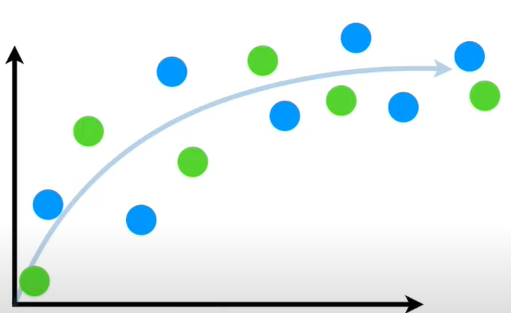

Blue dots are training and green are testing

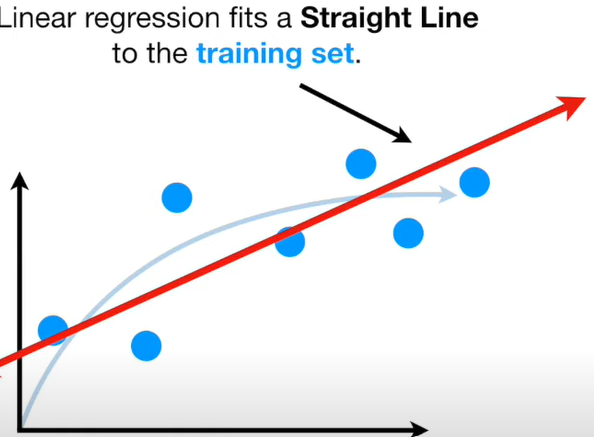

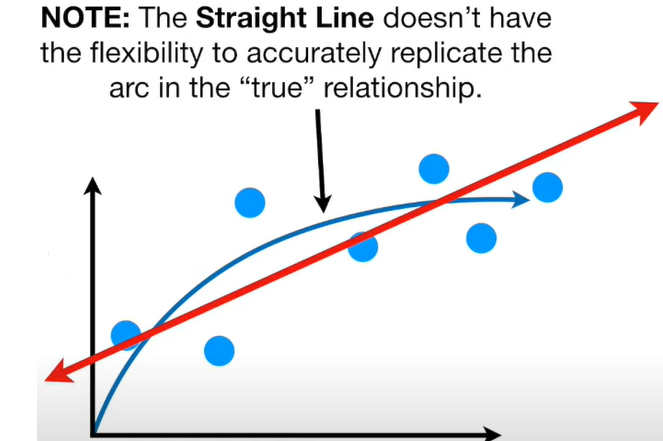

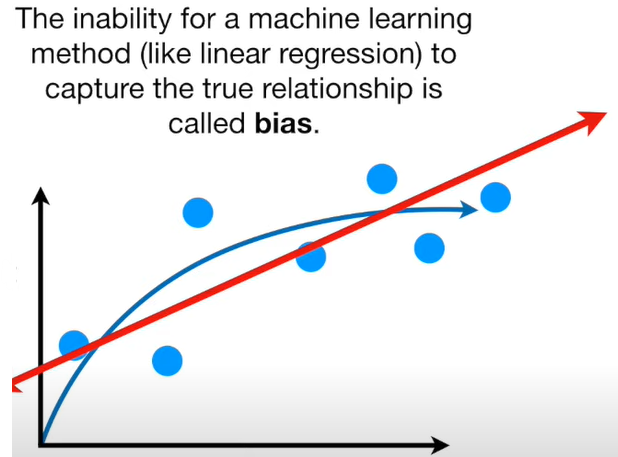

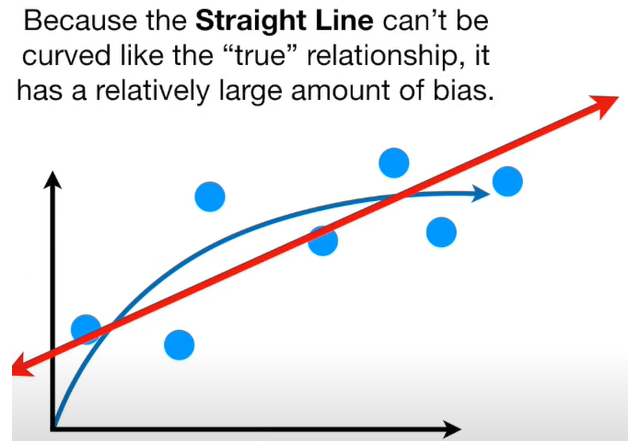

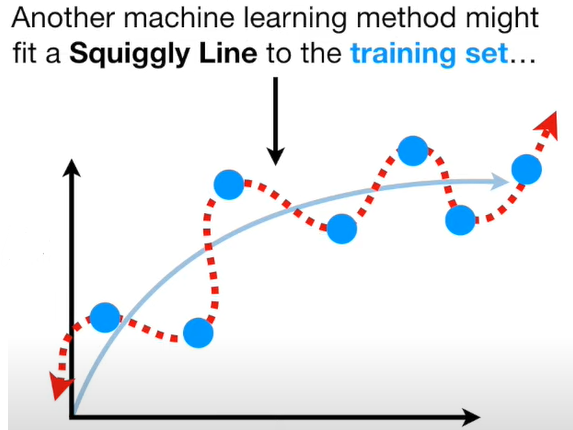

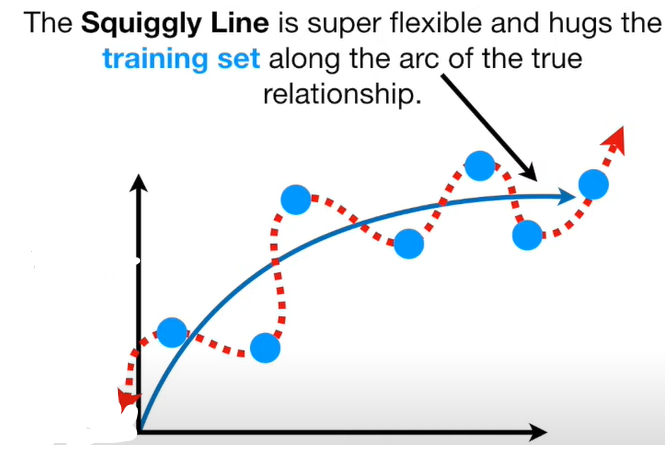

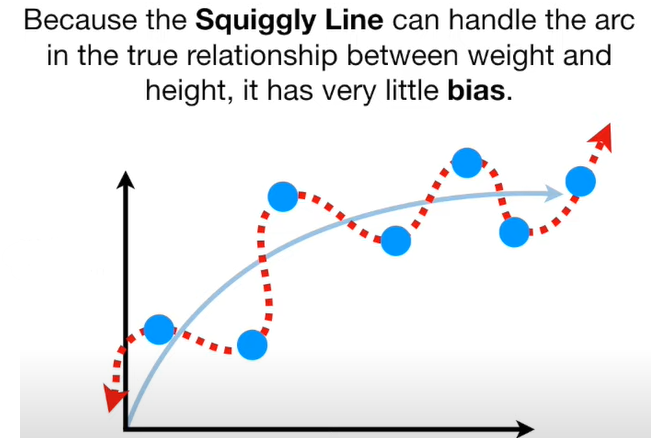

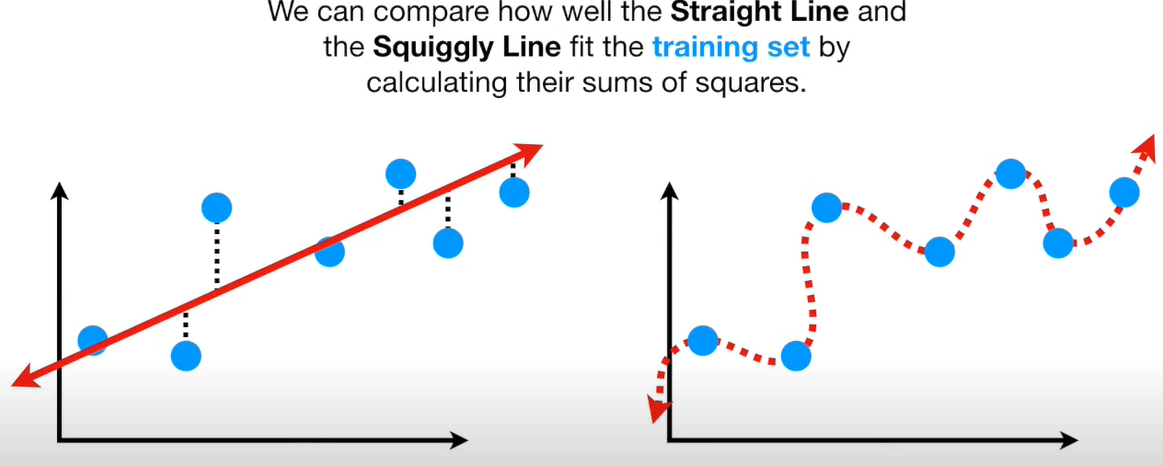

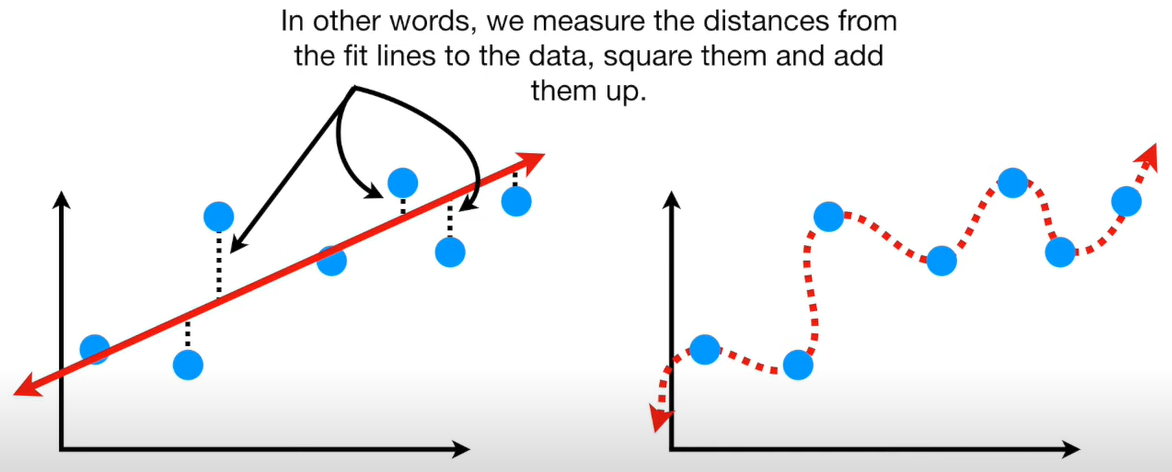

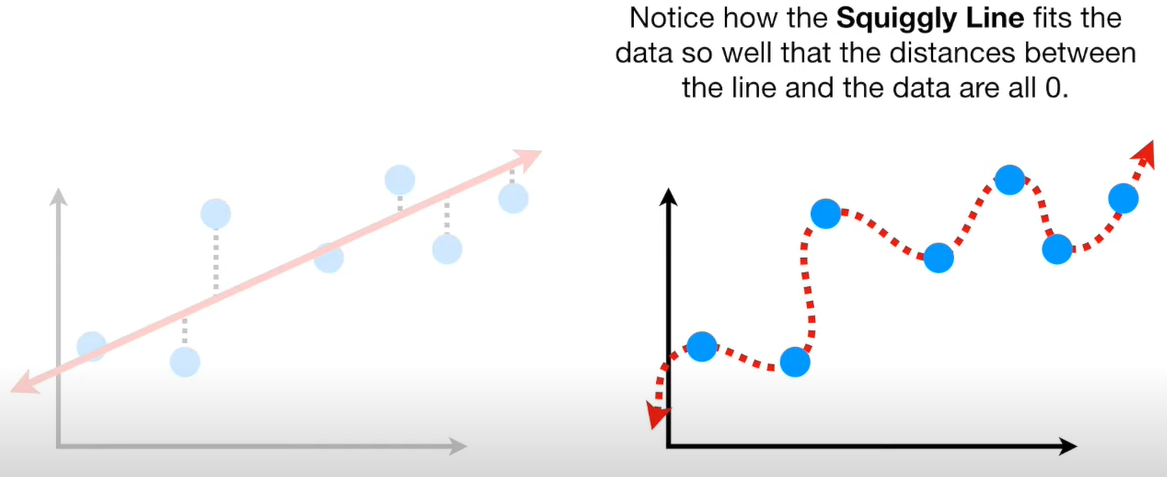

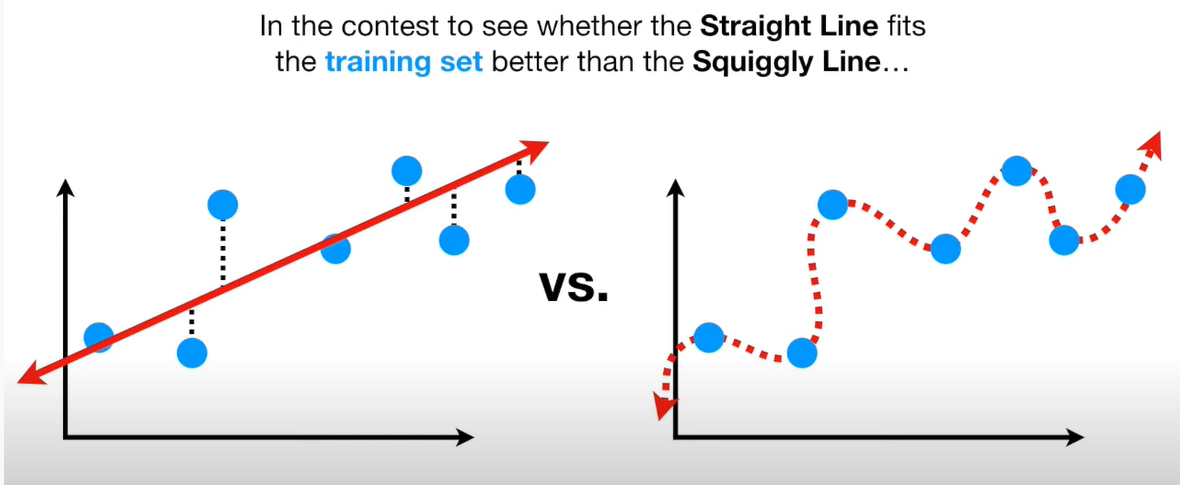

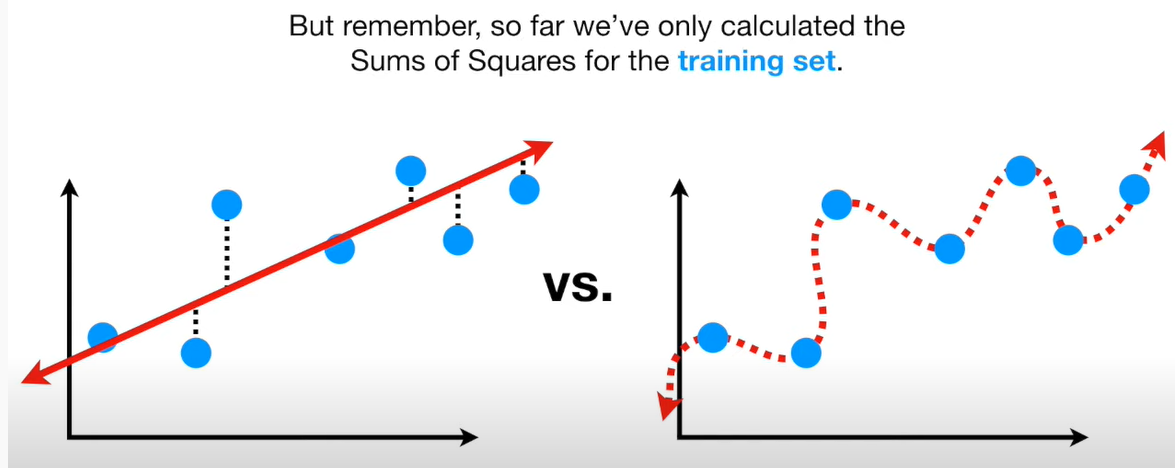

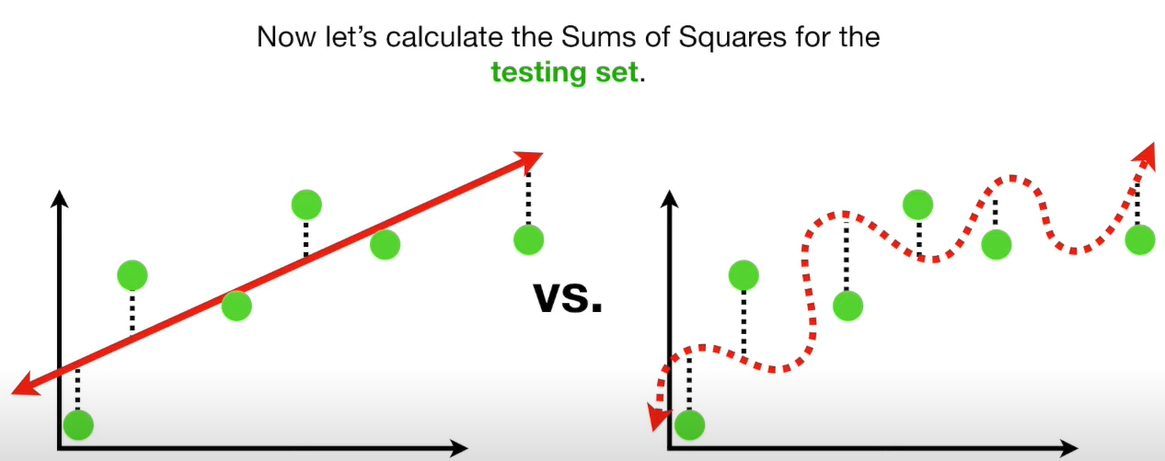

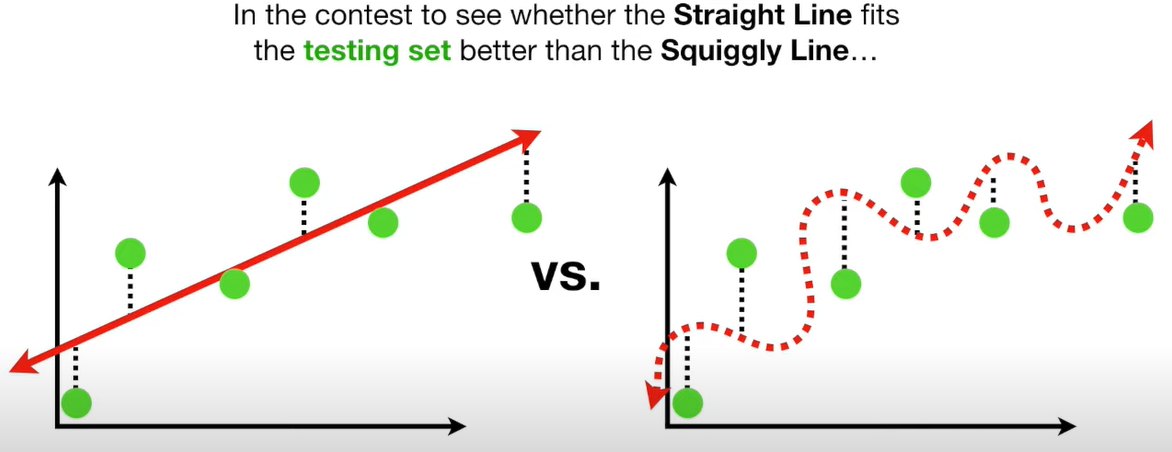

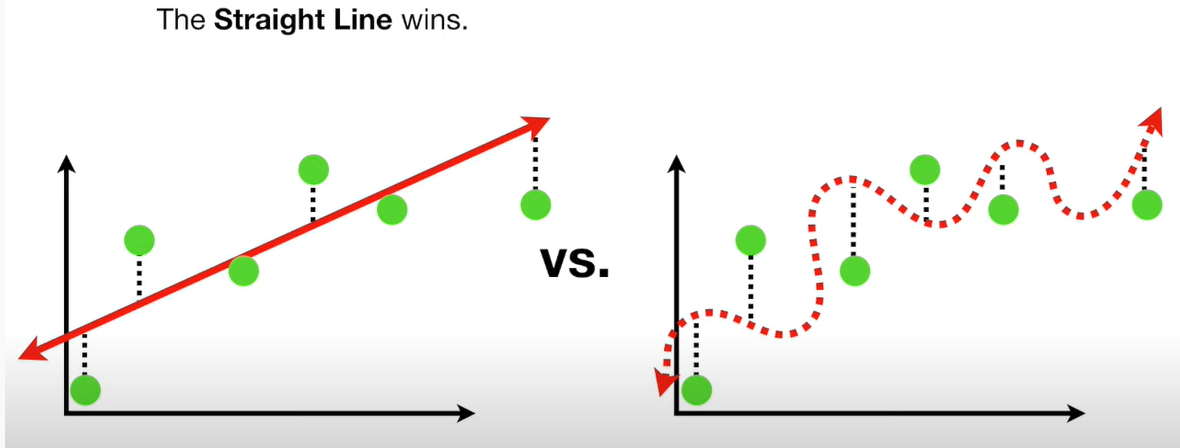

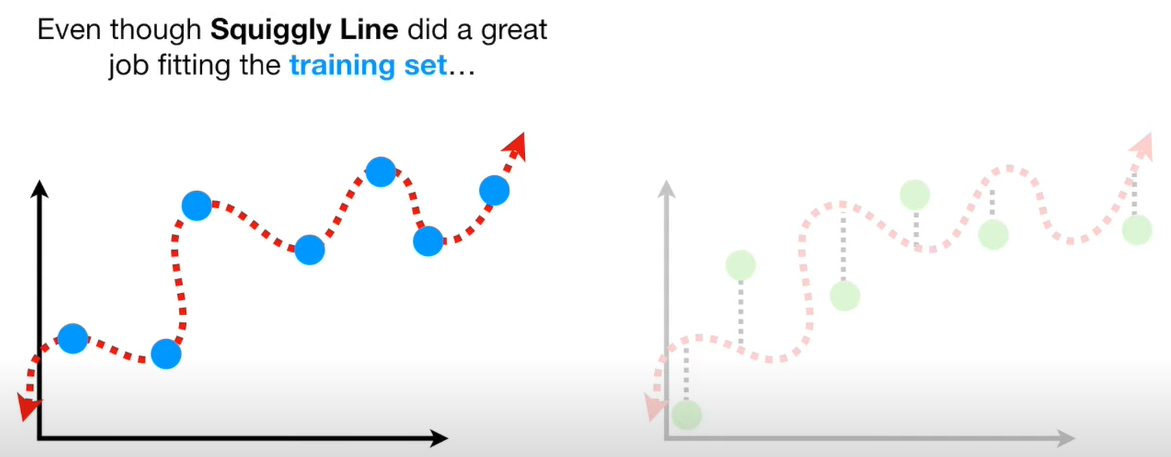

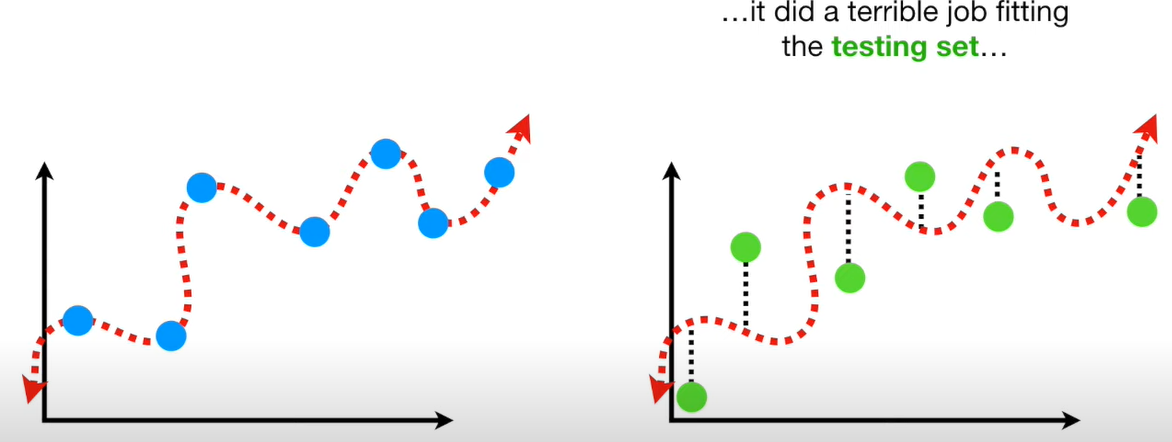

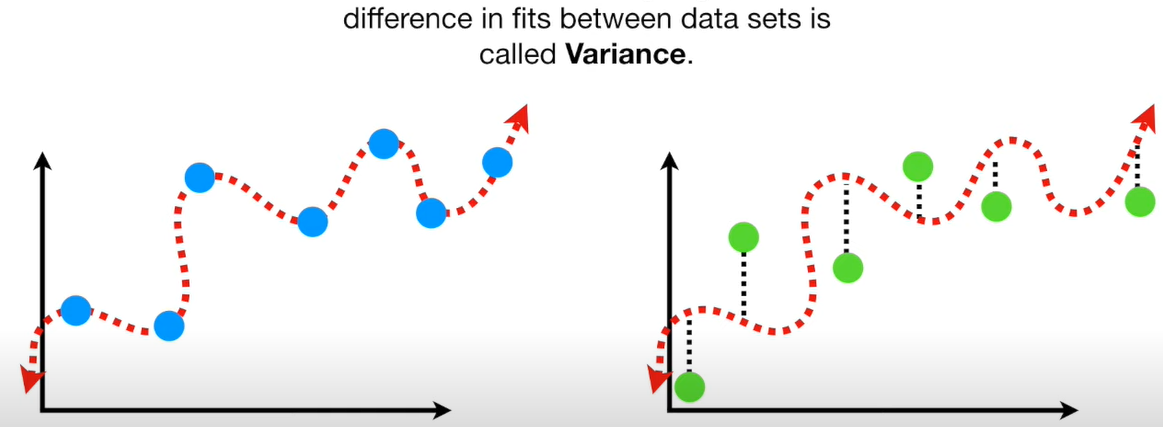

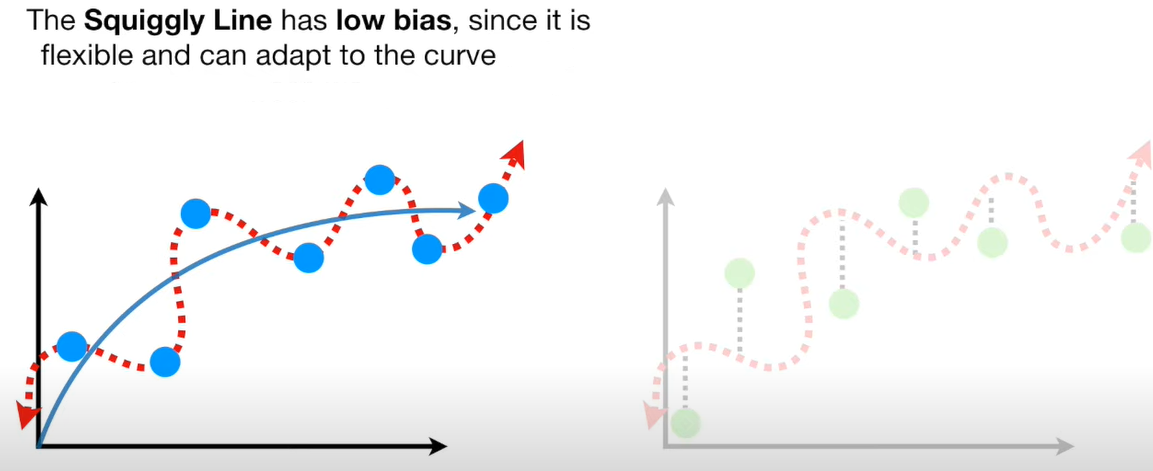

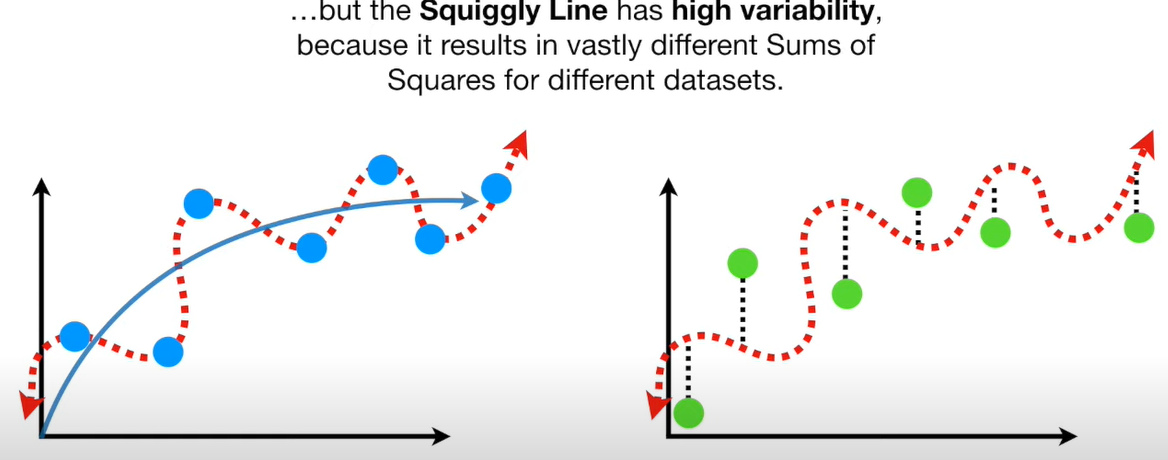

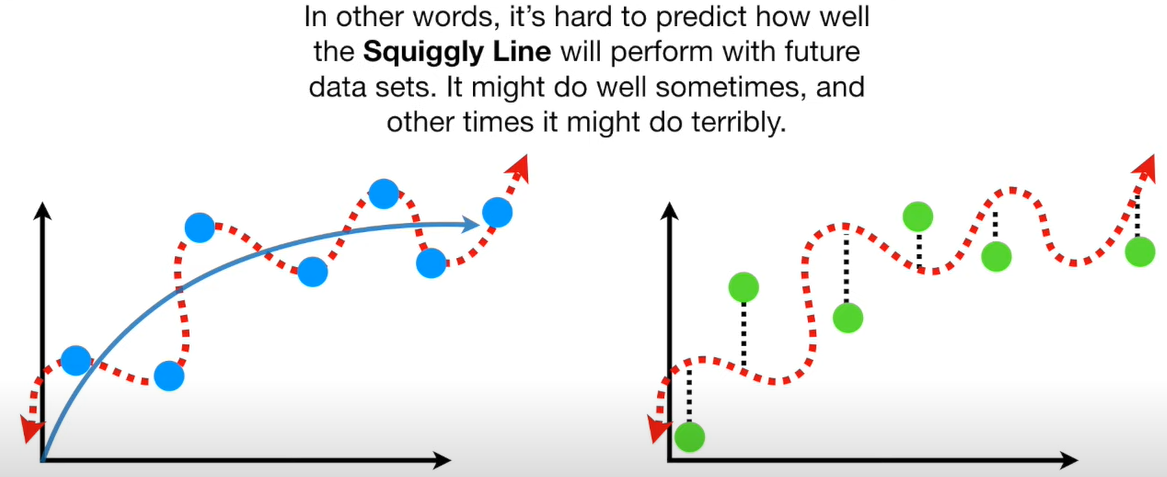

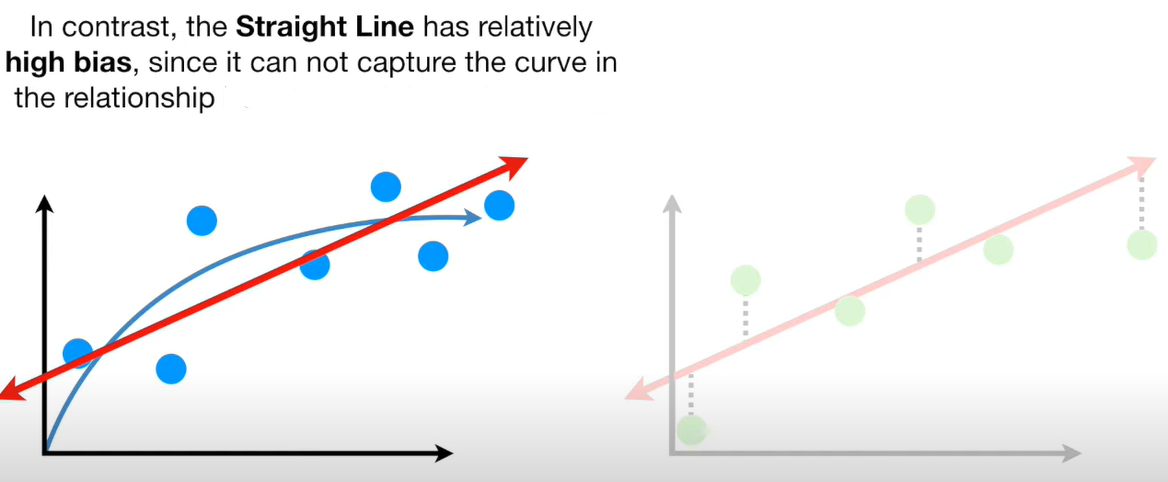

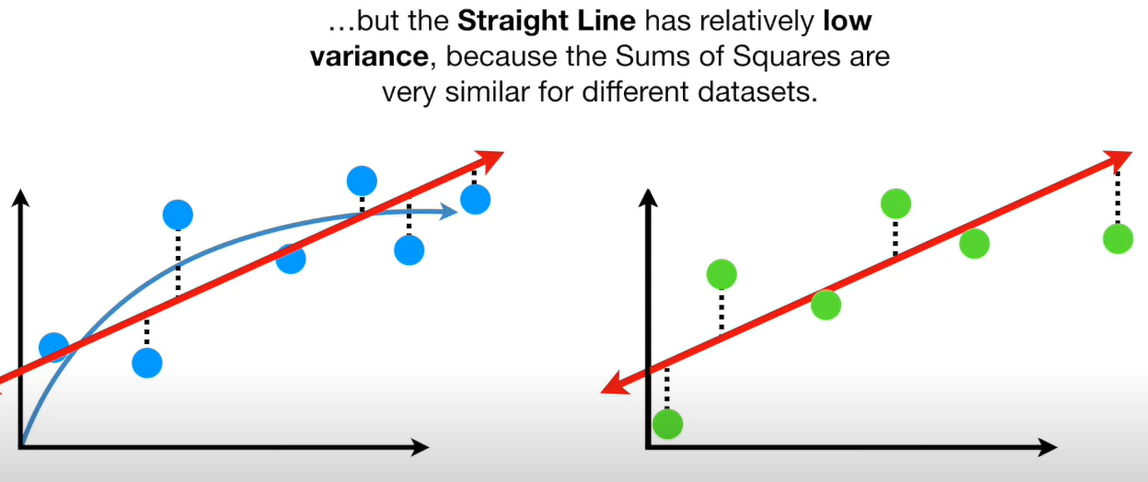

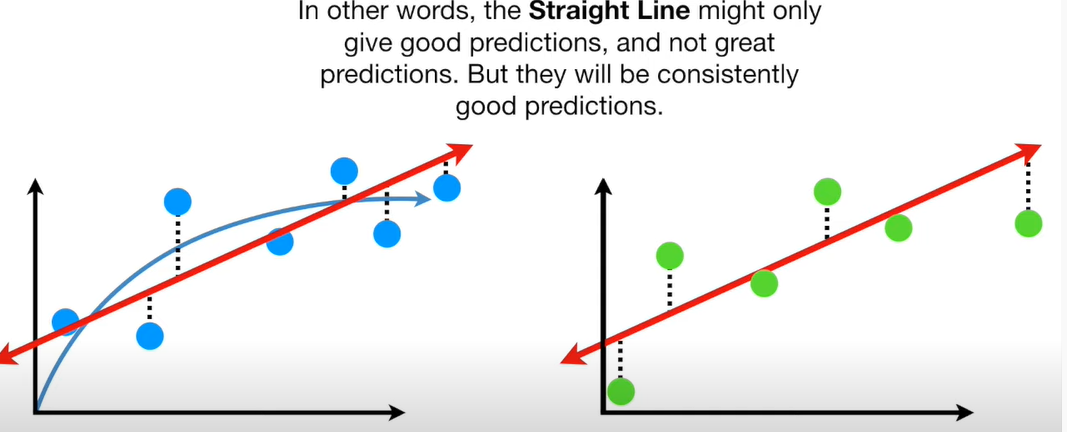

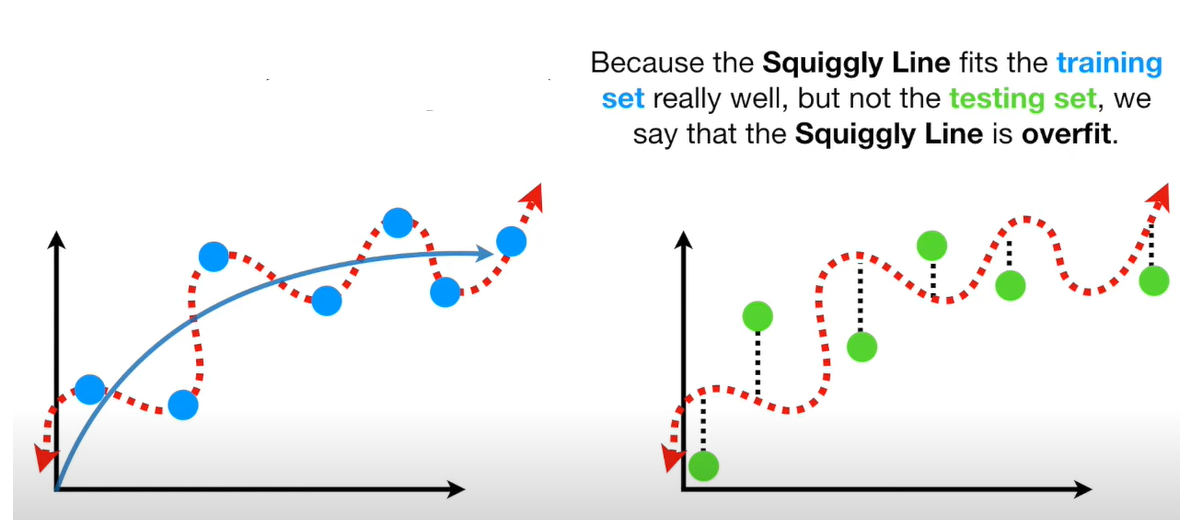

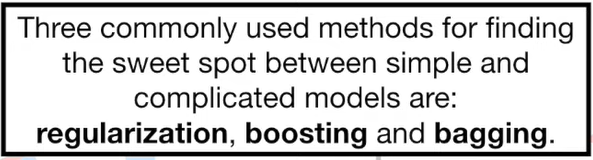

## **Simple Linear Regression**

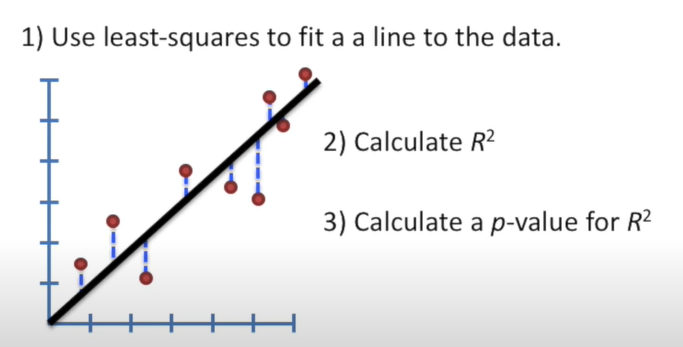

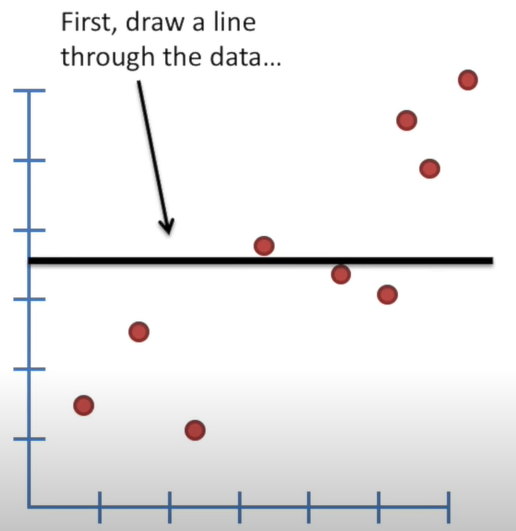

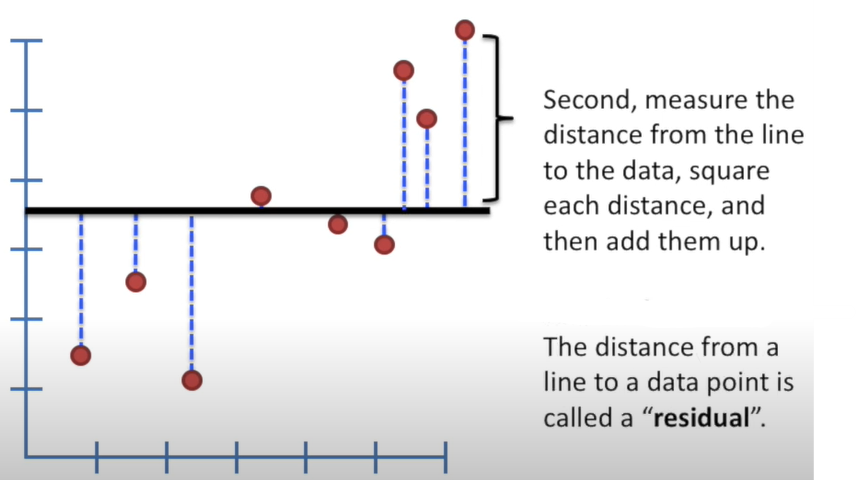

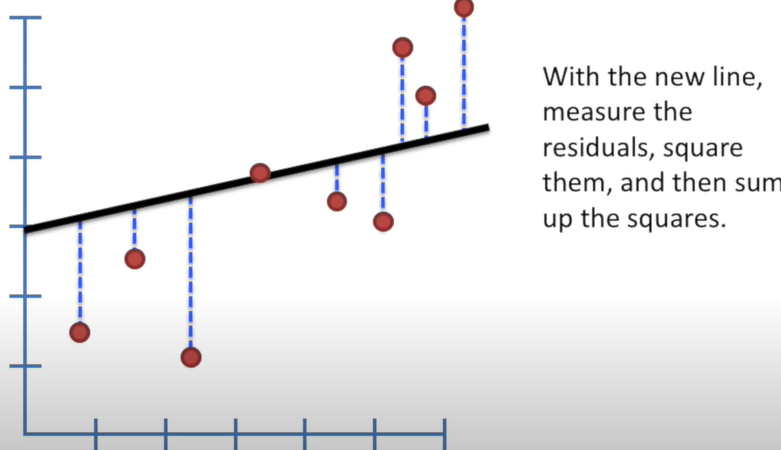

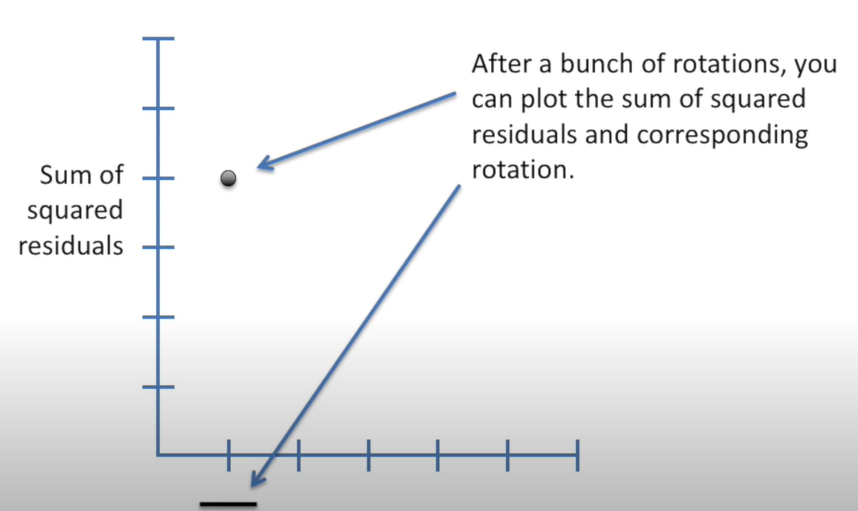

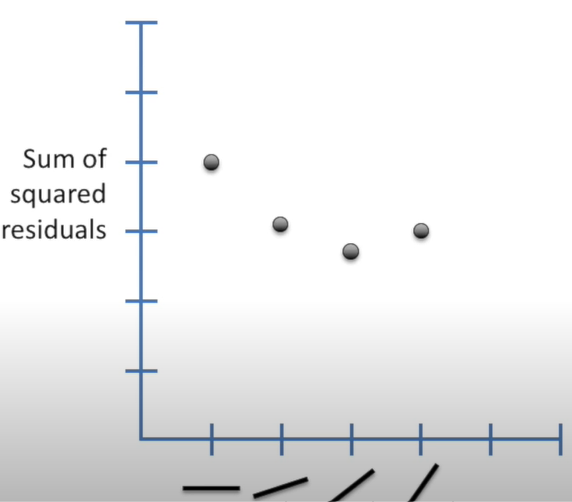

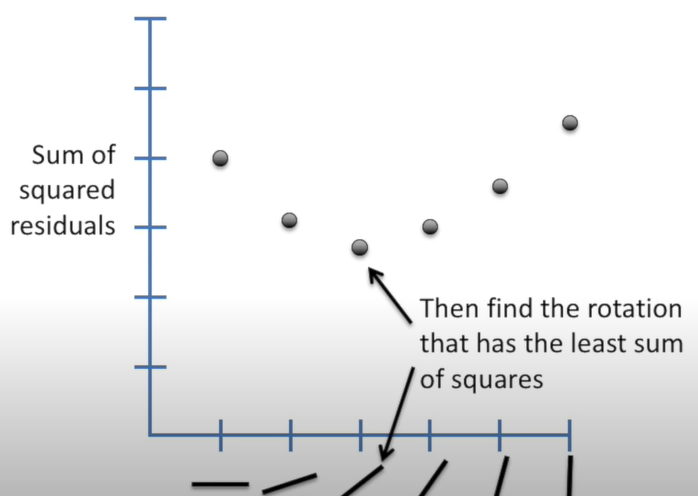

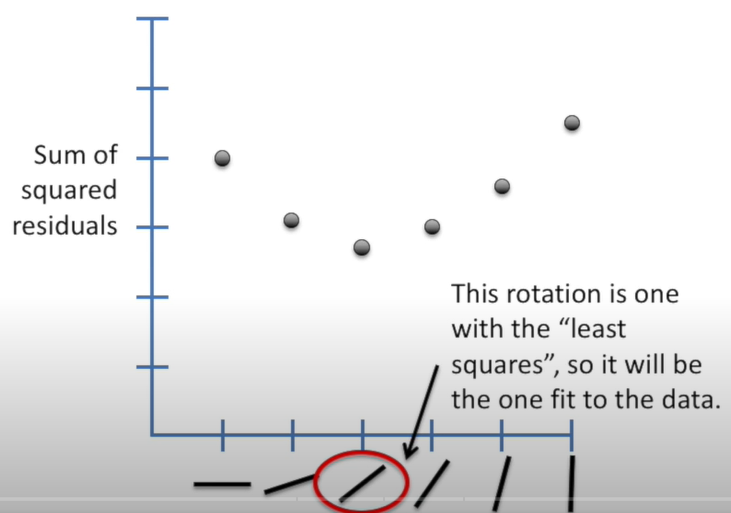

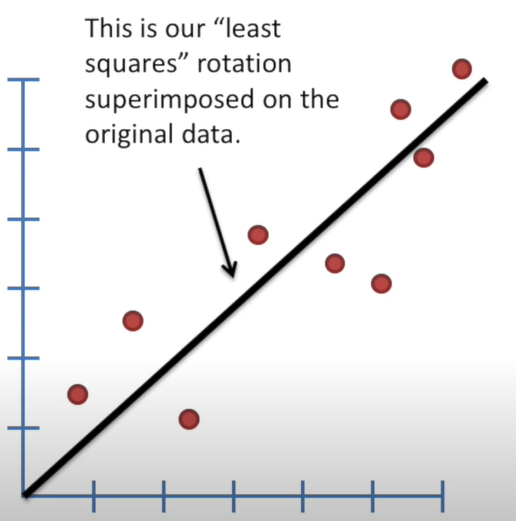

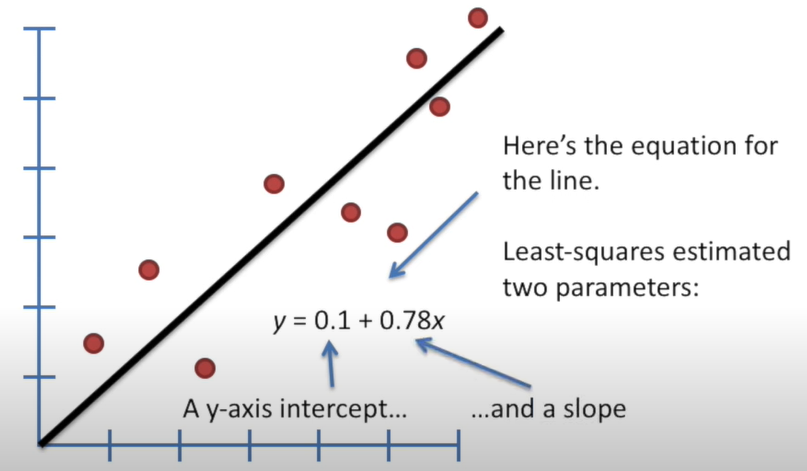

### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example:

Step 1: Import packages and classes

The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Step 2: Provide data

The second step is defining data to work with.

The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects.

This is the simplest way of providing data for regression:

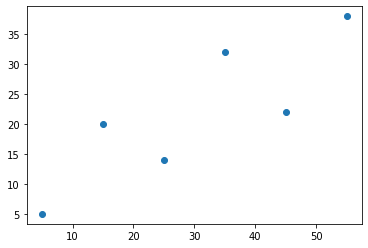

In [22]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
# ^^independent variable^^

y = np.array([5, 20, 14, 32, 22, 38])
# ^^dependent variable^^

plt.scatter(x, y)

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

Step 3: Create a model and fit it

The next step is to create a linear regression model and fit it using the existing data.

Let’s create an instance of the class LinearRegression, which will represent the regression model:

In [23]:
lin_reg = LinearRegression(fit_intercept=True)
# ^^by default, fit_intercept is True^^

This statement creates the variable model as the instance of LinearRegression. 

You can provide several optional parameters to LinearRegression:

fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).

normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False)

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [24]:
lin_reg.fit(x,y)

LinearRegression()

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments.

In other words, .fit() fits the model.

you can replace the last two statements with this one:

In [25]:
"""model = LinearRegression().fit(x, y)""" 
# ^^this statement does the same thing -- it’s just shorter^^

'model = LinearRegression().fit(x, y)'

Step 5: Get results

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.

You can obtain the coefficient of determination (𝑅²) with .score() called on model:

In [26]:
lin_reg.coef_

array([0.54])

In [27]:
lin_reg.intercept_

5.633333333333329

In [28]:
# r**2 - coeff of determination

r_sq = lin_reg.score(x, y)
r_sq

0.7158756137479542

y = 0.54 x + 5.63

The code above illustrates how to get 𝑏₀ and 𝑏₁. You can notice that .intercept_ is a scalar, while .coef_ is an array.

The value 𝑏₀ = 5.63 (approximately) illustrates that your model predicts the response 5.63 when 𝑥 is zero.

The value 𝑏₁ = 0.54 means that the predicted response rises by 0.54 when 𝑥 is increased by one.

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [29]:
x_new = np.linspace(-1, 11).reshape((-1, 1))

x_new

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

In [30]:
y_new = lin_reg.predict(x_new)

y_new

array([ 5.09333333,  5.22557823,  5.35782313,  5.49006803,  5.62231293,
        5.75455782,  5.88680272,  6.01904762,  6.15129252,  6.28353741,
        6.41578231,  6.54802721,  6.68027211,  6.81251701,  6.9447619 ,
        7.0770068 ,  7.2092517 ,  7.3414966 ,  7.4737415 ,  7.60598639,
        7.73823129,  7.87047619,  8.00272109,  8.13496599,  8.26721088,
        8.39945578,  8.53170068,  8.66394558,  8.79619048,  8.92843537,
        9.06068027,  9.19292517,  9.32517007,  9.45741497,  9.58965986,
        9.72190476,  9.85414966,  9.98639456, 10.11863946, 10.25088435,
       10.38312925, 10.51537415, 10.64761905, 10.77986395, 10.91210884,
       11.04435374, 11.17659864, 11.30884354, 11.44108844, 11.57333333])

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

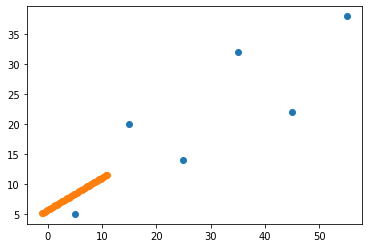

In [31]:
plt.scatter(x, y)
plt.scatter(x_new, y_new)

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

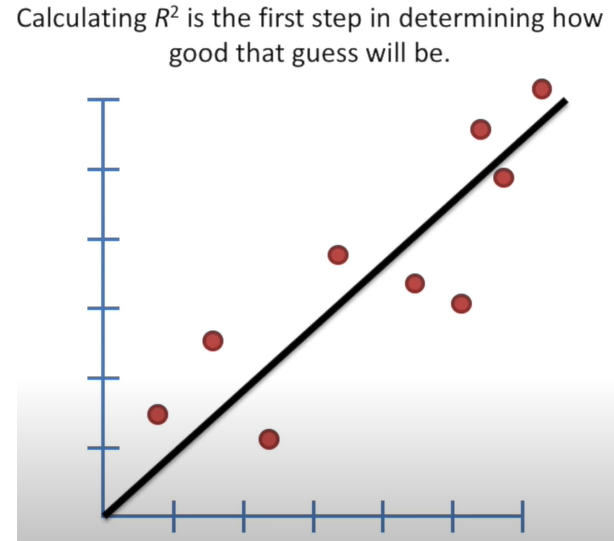

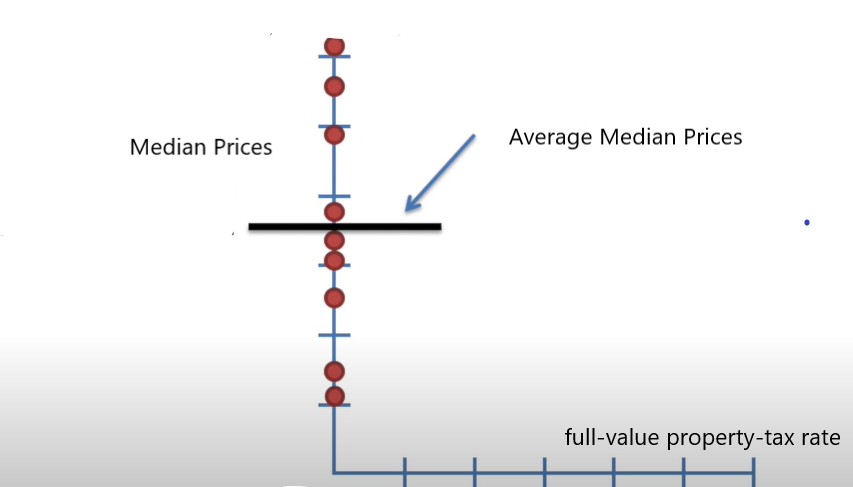

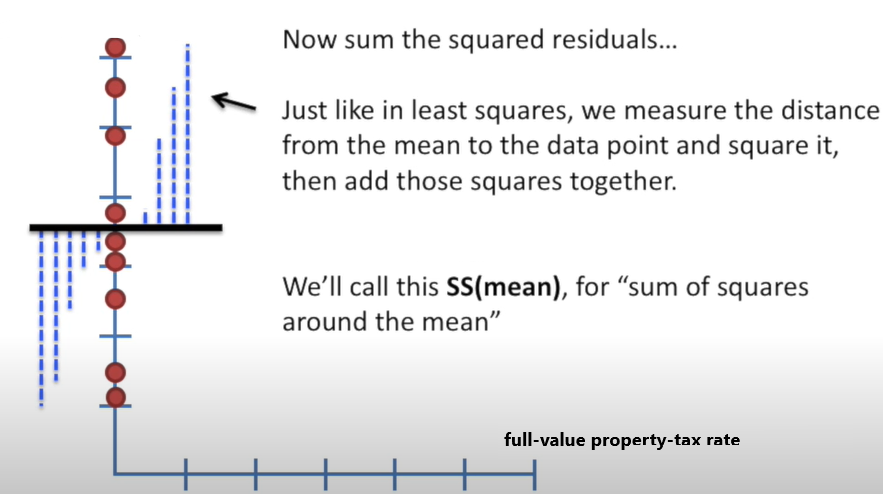

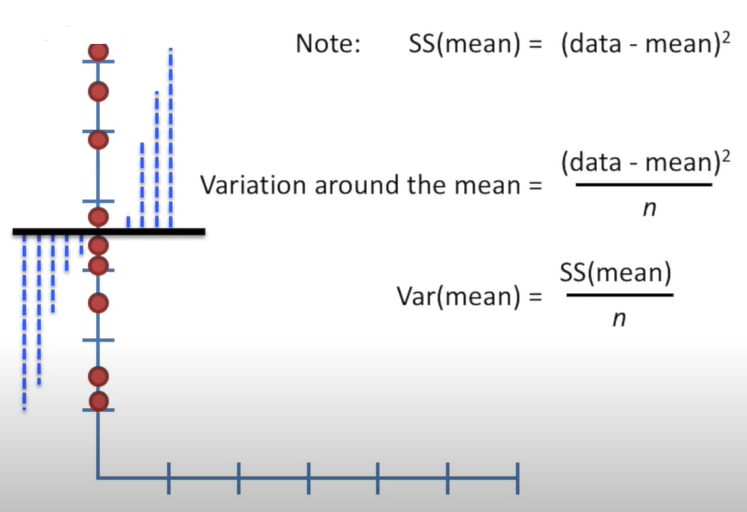

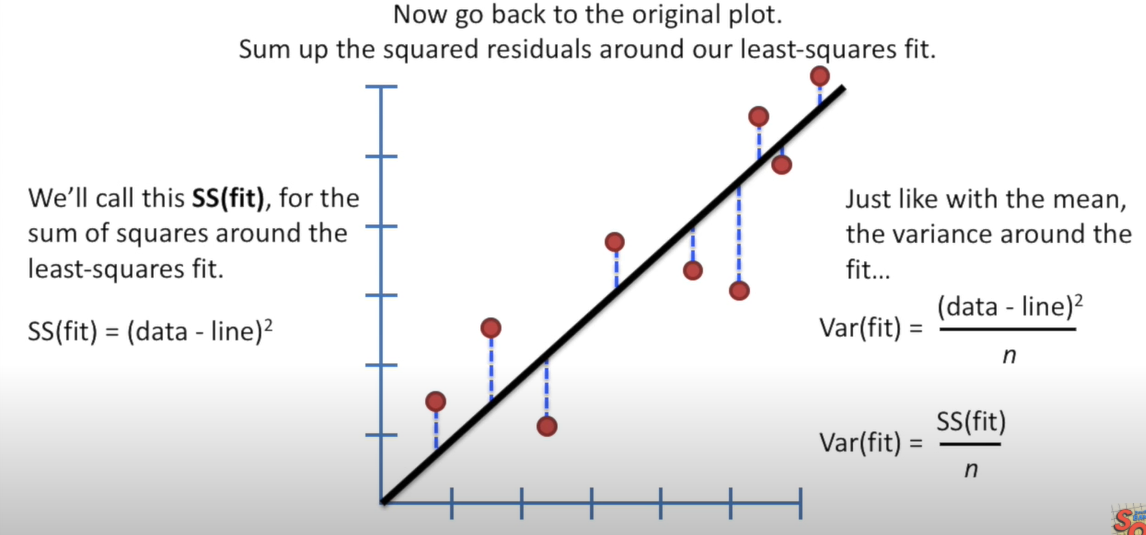

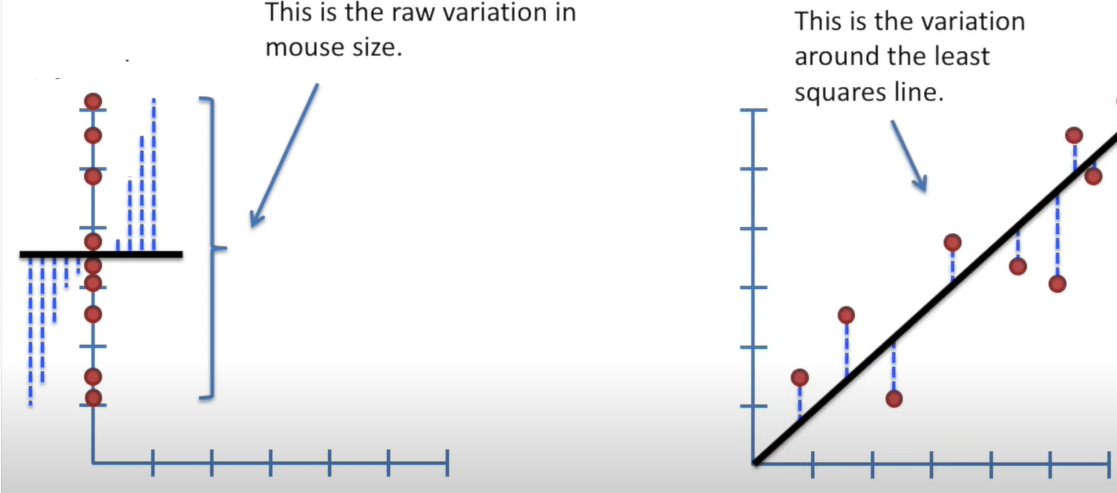

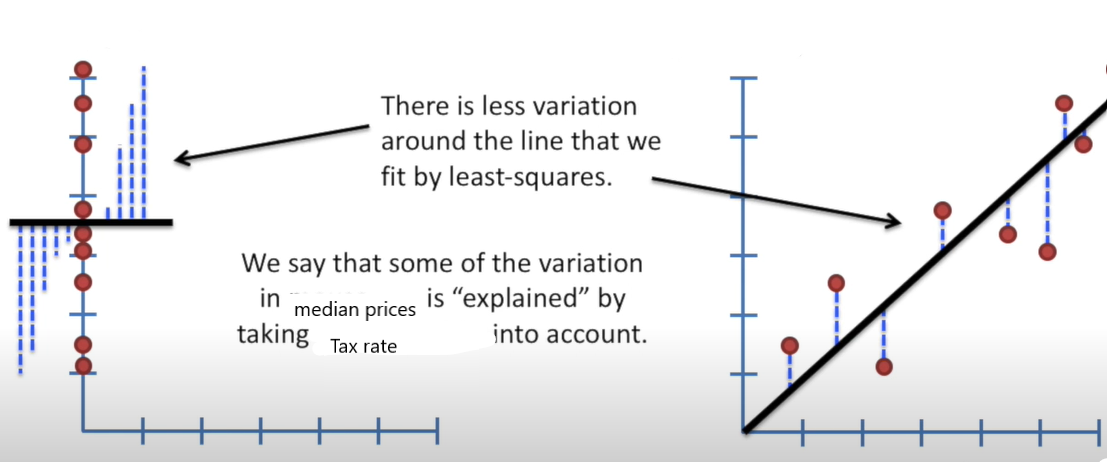

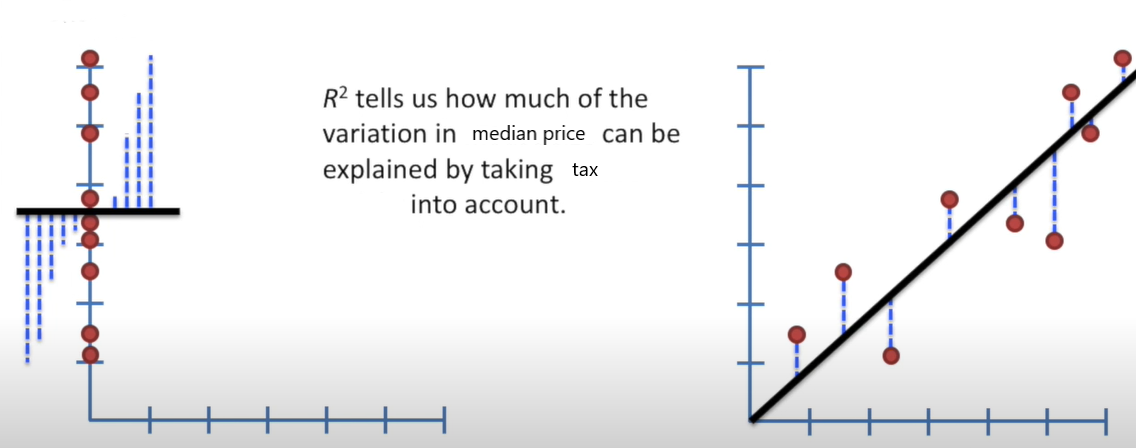

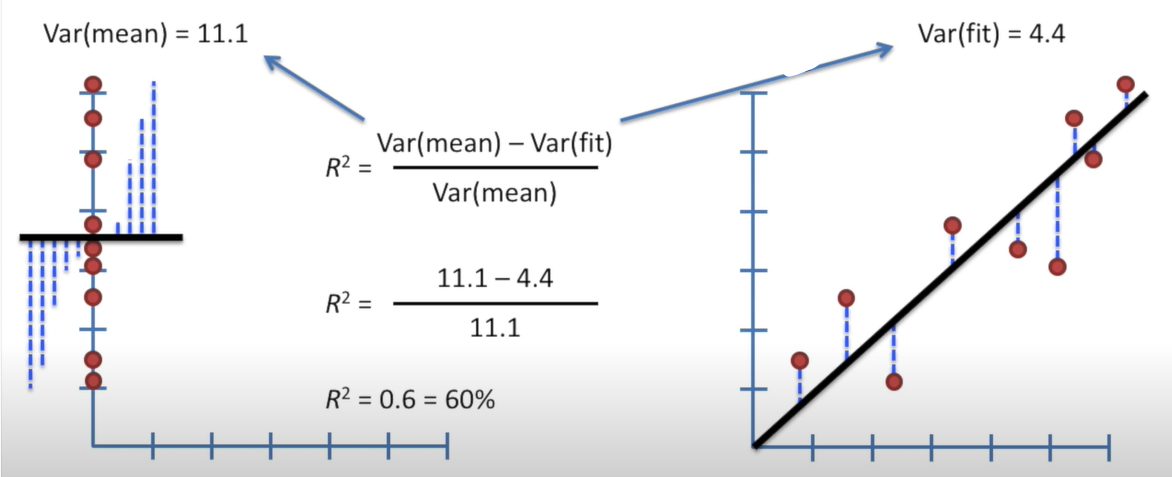

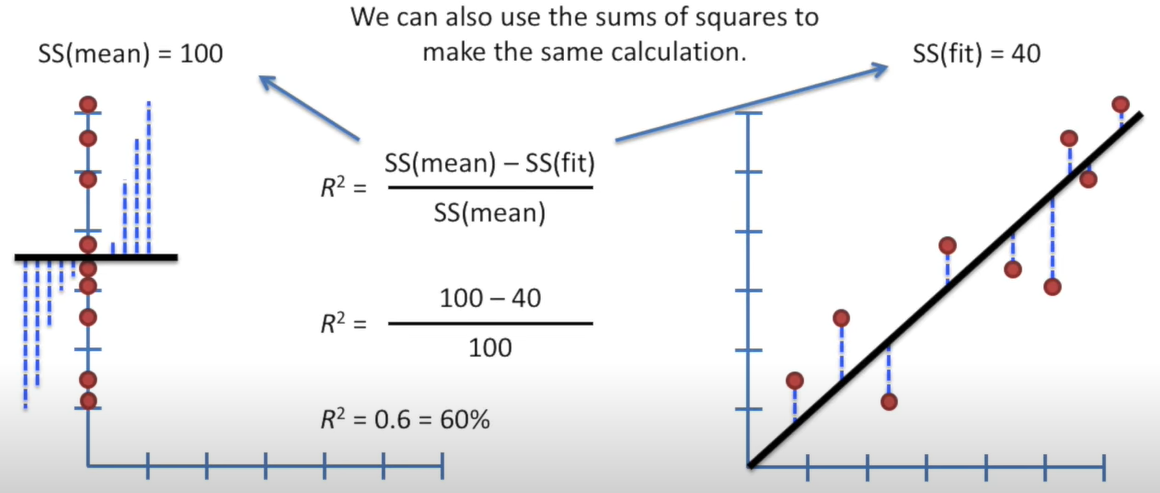

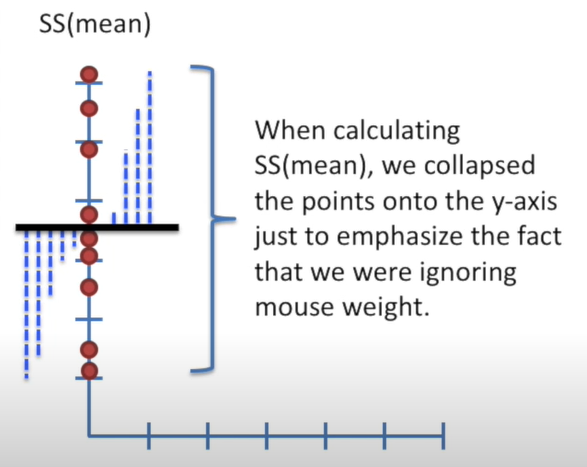

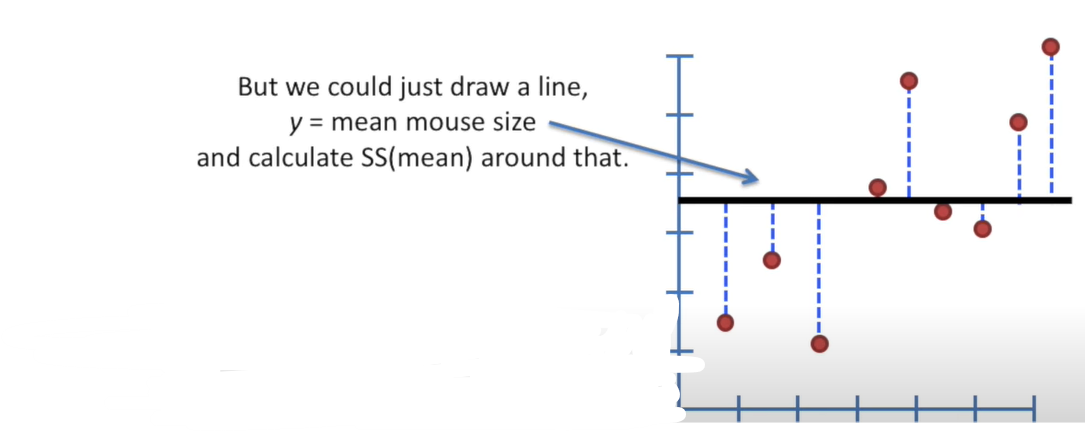

**POLYNOMIAL REGRESSION**

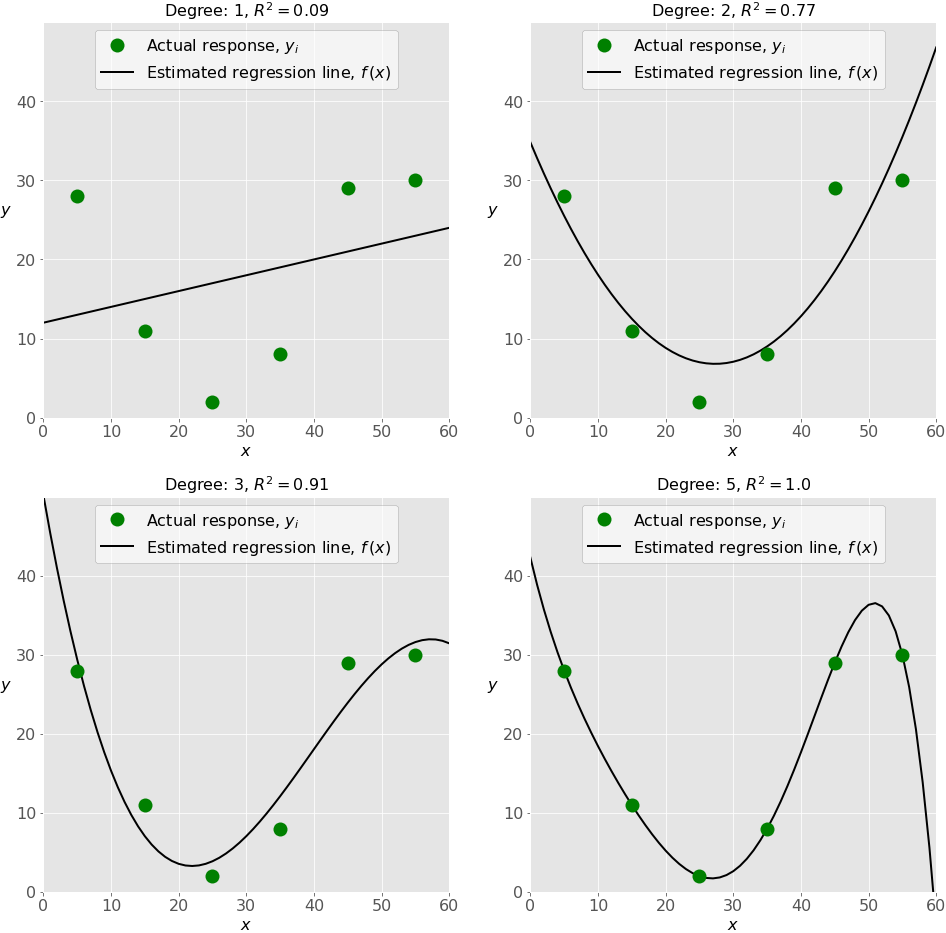

## **Polynomial Regression With scikit-learn**

Implementing polynomial regression with scikit-learn is very similar to linear regression. 

There is only one extra step: you need to transform the array of inputs to include non-linear terms such as 𝑥²

To generate a higher order equation we can add powers of the original features as new features. The linear model,

image.png





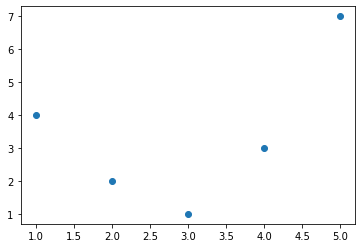

In [32]:
x = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([4, 2, 1, 3, 7])

plt.scatter(x, y)

we can fit a line to the data using ``LinearRegression`` and get the optimal result:

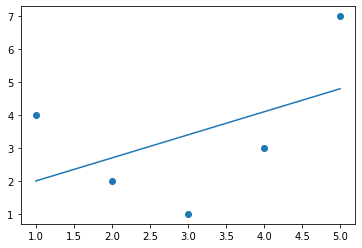

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x, yfit)

t's clear that we need a more sophisticated model to describe the relationship between  x  and  y .

One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3, include_bias=False)
# ^^include_bias == include y-int during calculation^^

# it's better to include y-int only once... and
# we want to do that during fitting

X2 = poly_reg.fit_transform(x)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

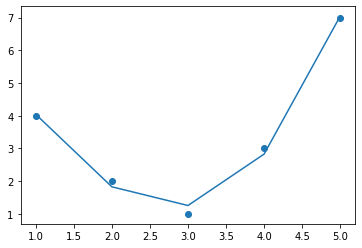

In [35]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, yfit)

In [36]:
model.coef_

array([-3.76190476,  0.32142857,  0.08333333])